In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your dataset (assuming it's a CSV file)
df = pd.read_csv("al_data.csv")  

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Convert categorical column "Processing" to numerical
df["Processing"] = label_encoder.fit_transform(df["Processing"])

# Display the first few rows
print(df.head())

# Save the transformed dataset
df.to_csv("processed_dataset.csv", index=False)


   Unnamed: 0  Processing   Ag       Al    B   Be   Bi   Cd   Co   Cr  ...  \
0           0           4  0.0  0.88011  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1           1           5  0.0  0.88011  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2           2           4  0.0  0.99450  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3           3           4  0.0  0.99250  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4           4           4  0.0  0.99000  0.0  0.0  0.0  0.0  0.0  0.0  ...   

        Si   Sn   Ti    V      Zn      Zr  Elongation (%)  \
0  0.00034  0.0  0.0  0.0  0.0768  0.0012            16.8   
1  0.00034  0.0  0.0  0.0  0.0768  0.0012            15.4   
2  0.00000  0.0  0.0  0.0  0.0000  0.0000            10.5   
3  0.00000  0.0  0.0  0.0  0.0000  0.0000             4.5   
4  0.00000  0.0  0.0  0.0  0.0000  0.0000             7.0   

   Tensile Strength (MPa)  Yield Strength (MPa)  class  
0                   651.6                 583.3      2  
1                   557.0                 513.0   

Unnamed: 0                  int64
Processing                  int64
Ag                        float64
Al                        float64
B                         float64
Be                        float64
Bi                        float64
Cd                        float64
Co                        float64
Cr                        float64
Cu                        float64
Er                        float64
Eu                        float64
Fe                        float64
Ga                        float64
Li                        float64
Mg                        float64
Mn                        float64
Ni                        float64
Pb                        float64
Sc                        float64
Si                        float64
Sn                        float64
Ti                        float64
V                         float64
Zn                        float64
Zr                        float64
Elongation (%)            float64
Tensile Strength (MPa)    float64
Yield Strength

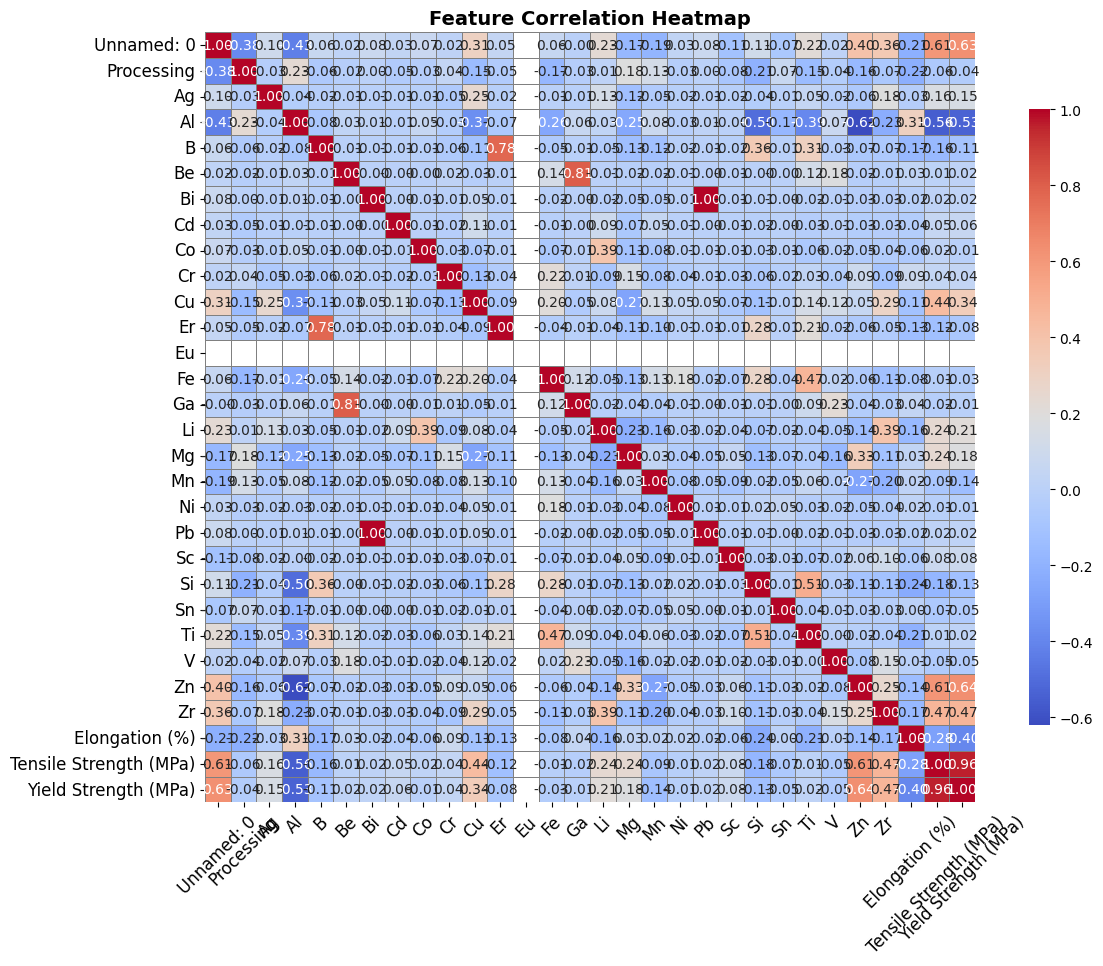

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv("processed_dataset.csv")

# Check for non-numeric values
print(df.dtypes)

# Convert categorical column "Processing" to numerical using Label Encoding
if "Processing" in df.columns:
    label_encoder = LabelEncoder()
    df["Processing"] = label_encoder.fit_transform(df["Processing"])

# Drop non-numeric values or handle 'outlier' text
df.replace("outlier", pd.NA, inplace=True)  # Replace with NaN
df.dropna(inplace=True)  # Remove rows with NaN values

# Define input features (X) and target variables (Y)
X = df.drop(columns=["Elongation (%)", "Tensile Strength (MPa)", "Yield Strength (MPa)"])  # Features
Y = df[["Elongation (%)", "Tensile Strength (MPa)", "Yield Strength (MPa)"]]  # Targets

# Split data into trai
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap with improved visibility
plt.figure(figsize=(14, 10))  # Increase figure size
sns.heatmap(
    corr_matrix, 
    annot=True,               # Show values inside heatmap
    fmt=".2f",                # Limit decimal places
    cmap="coolwarm",          # Use a diverging colormap
    linewidths=0.5,           # Add grid lines for clarity
    linecolor="gray",         # Grid line color
    square=True,              # Make heatmap squares uniform
    annot_kws={"size": 10},   # Increase annotation font size
    cbar_kws={"shrink": 0.8, "aspect": 30}  # Adjust color bar size
)

# Improve label readability
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=12)   # Keep y-axis labels horizontal
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight="bold")  # Add title

# Show the heatmap
plt.show()


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\HP\AppData\Local\Temp\ipykernel_13936\843888425.py:130: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="viridis")



🔥 Improved MLP Model Performance 🔥
✅ MAE: 15.6368
✅ RMSE: 22.2402
✅ R² Score: 0.7648


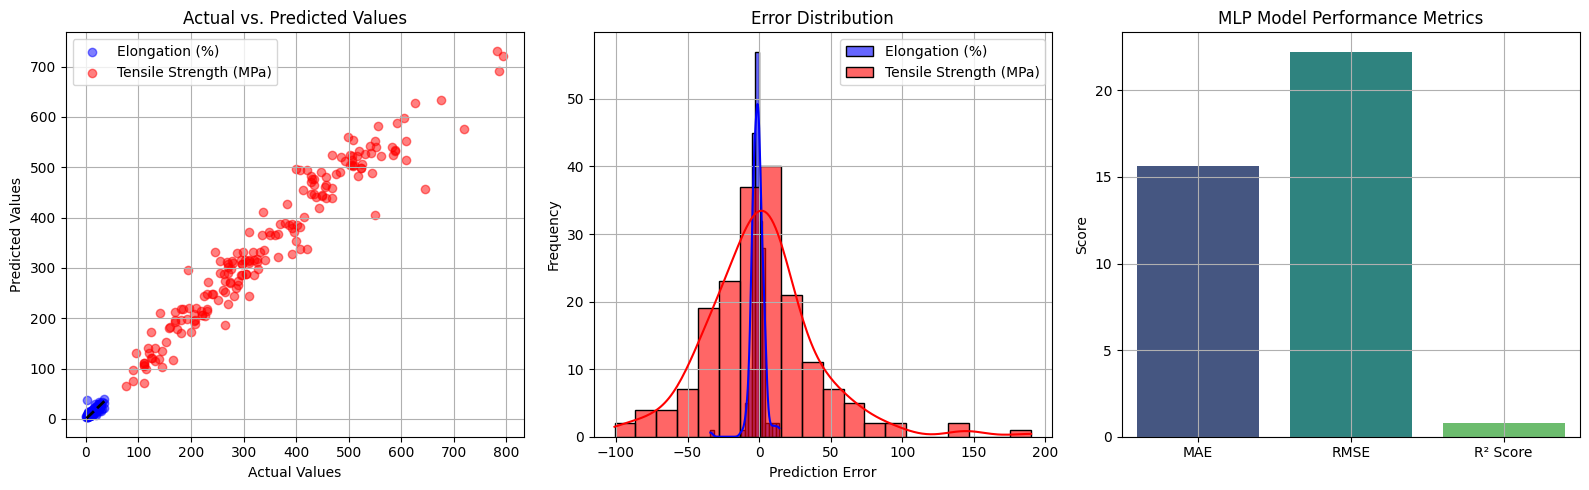

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# 📌 Load dataset
df = pd.read_csv("processed_dataset.csv")

# Convert categorical column "Processing" to numerical
if "Processing" in df.columns:
    label_encoder = LabelEncoder()
    df["Processing"] = label_encoder.fit_transform(df["Processing"])

# 📌 Handle Non-Numeric Values & Outliers
df.replace("outlier", np.nan, inplace=True)  # Convert 'outlier' to NaN
df = df.apply(pd.to_numeric, errors='coerce')  # Ensure all values are numeric
df.dropna(inplace=True)  # Remove any NaN rows

# 📌 Feature Selection based on Correlation
correlated_features = ["Zr", "Ti", "Fe", "Ga", "Yield Strength (MPa)"]
df.drop(columns=correlated_features, inplace=True)

# 📌 Remove Zero-Heavy Columns
zero_threshold = 0.8
zero_percentage = (df == 0).mean()
cols_to_drop = zero_percentage[zero_percentage > zero_threshold].index
df.drop(columns=cols_to_drop, inplace=True)

# Replace remaining zero values with column mean (excluding target columns)
for col in df.columns:
    if col not in ["Elongation (%)", "Tensile Strength (MPa)"]:
        non_zero_mean = df.loc[df[col] != 0, col].mean()
        df[col] = df[col].replace(0, non_zero_mean)

# Define input features (X) and target variables (Y)
X = df.drop(columns=["Elongation (%)", "Tensile Strength (MPa)"])
Y = df[["Elongation (%)", "Tensile Strength (MPa)"]]

# 📌 Feature Scaling & Dimensionality Reduction
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaler = StandardScaler()
Y_scaled = y_scaler.fit_transform(Y)

# 📌 Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_scaled)

# 📌 Feature Selection: Remove Low-Variance Features
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(X_poly)

# 📌 Apply PCA (Retain 95% Variance)
pca = PCA(n_components=0.95, svd_solver='full')
X_pca = pca.fit_transform(X_selected)

# 📌 Split Data into Training & Testing Sets
X_train, X_test, Y_train, Y_test = train_test_split(X_pca, Y_scaled, test_size=0.2, random_state=42)

# 📌 Train an Optimized MLP Model
mlp_model = MLPRegressor(
    hidden_layer_sizes=(512, 256, 128),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    learning_rate_init=0.0005,
    batch_size=64,
    early_stopping=True,
    max_iter=3000,
    random_state=42
)

# Train the model
mlp_model.fit(X_train, Y_train)

# Make predictions
Y_pred_scaled = mlp_model.predict(X_test)

# Convert predictions back to original scale
Y_pred = y_scaler.inverse_transform(Y_pred_scaled)
Y_test_original = y_scaler.inverse_transform(Y_test)

# 📌 Evaluate Model Performance
mae = mean_absolute_error(Y_test_original, Y_pred)
rmse = mean_squared_error(Y_test_original, Y_pred, squared=False)
r2 = r2_score(Y_test_original, Y_pred)

# Print results
print("\n🔥 Improved MLP Model Performance 🔥")
print(f"✅ MAE: {mae:.4f}")
print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ R² Score: {r2:.4f}")

# 📌 Visualization
plt.figure(figsize=(16, 5))

# 🔹 Scatter Plot: Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(Y_test_original[:, 0], Y_pred[:, 0], color='blue', alpha=0.5, label="Elongation (%)")
plt.scatter(Y_test_original[:, 1], Y_pred[:, 1], color='red', alpha=0.5, label="Tensile Strength (MPa)")
plt.plot([min(Y_test_original[:, 0]), max(Y_test_original[:, 0])], 
         [min(Y_test_original[:, 0]), max(Y_test_original[:, 0])], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.legend()
plt.grid()

# 🔹 Error Distribution Plot
plt.subplot(1, 3, 2)
errors = Y_test_original - Y_pred
sns.histplot(errors[:, 0], bins=20, kde=True, color='blue', label="Elongation (%)", alpha=0.6)
sns.histplot(errors[:, 1], bins=20, kde=True, color='red', label="Tensile Strength (MPa)", alpha=0.6)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution")
plt.legend()
plt.grid()

# 🔹 Bar Chart: Model Performance Metrics
plt.subplot(1, 3, 3)
metrics = ["MAE", "RMSE", "R² Score"]
values = [mae, rmse, r2]
sns.barplot(x=metrics, y=values, palette="viridis")
plt.title("MLP Model Performance Metrics")
plt.ylabel("Score")
plt.grid()

plt.tight_layout()
plt.show()
